In [33]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers,models

In [2]:
BATCH_SIZE = 32
IMG_SIZE = 48
ALPHA = 0.35

dir = os.listdir();path = dir[dir.index("data")]

d_train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=42,
    label_mode='categorical',
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

d_val = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=42,
    label_mode='categorical',
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

class_names = d_train.class_names

print(f"\nClasses:\n{class_names}")

d_train = d_train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
d_val = d_val.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 1633 files belonging to 2 classes.
Using 1307 files for training.
Found 1633 files belonging to 2 classes.
Using 326 files for validation.

Classes:
['fire', 'non_fire']


## Not simulating Esp CAM conditions

In [3]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE,IMG_SIZE,3),
    alpha = ALPHA,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = models.Sequential([
    layers.Rescaling(1./127.5,offset=-1,input_shape=(IMG_SIZE,IMG_SIZE,3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(len(class_names),activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    d_train,
    validation_data=d_val,
    epochs=7
)

print(f"train_acc: {history.history['accuracy']}\nval_acc: {history.history['val_accuracy']}")



C:\Users\vicen\AppData\Local\Temp\ipykernel_17024\3731895567.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(
c:\Users\vicen\miniconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_0.35_224            │ (None, 2, 2, 1280)     │       410,208 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,770 (1.57 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 410,208 (1.56 MB)

Epoch 1/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 183ms/step - accuracy: 0.6915 - loss: 0.7198 - val_accuracy: 0.9141 - val_loss: 0.1923
Epoch 2/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9348 - loss: 0.1793 - val_accuracy: 0.9356 - val_loss: 0.1583
Epoch 3/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9466 - loss: 0.1347 - val_accuracy: 0.9387 - val_loss: 0.1467
Epoch 4/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9544 - loss: 0.1075 - val_accuracy: 0.9417 - val_loss: 0.1407
Epoch 5/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9697 - loss: 0.0822 - val_accuracy: 0.9448 - val_loss: 0.1343
Epoch 6/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9736 - loss: 0.0758 - val_accuracy: 0.9479 - val_loss: 0.1305
Epoch 7/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9813 - loss: 0.0661 - val_accuracy: 0.9479 - val_loss: 0.1301
train_acc: [0.8255547285079956, 0.9403213262557983, 0.954093337059021, 0.9640398025512695, 0.9755164384841919, 0.980

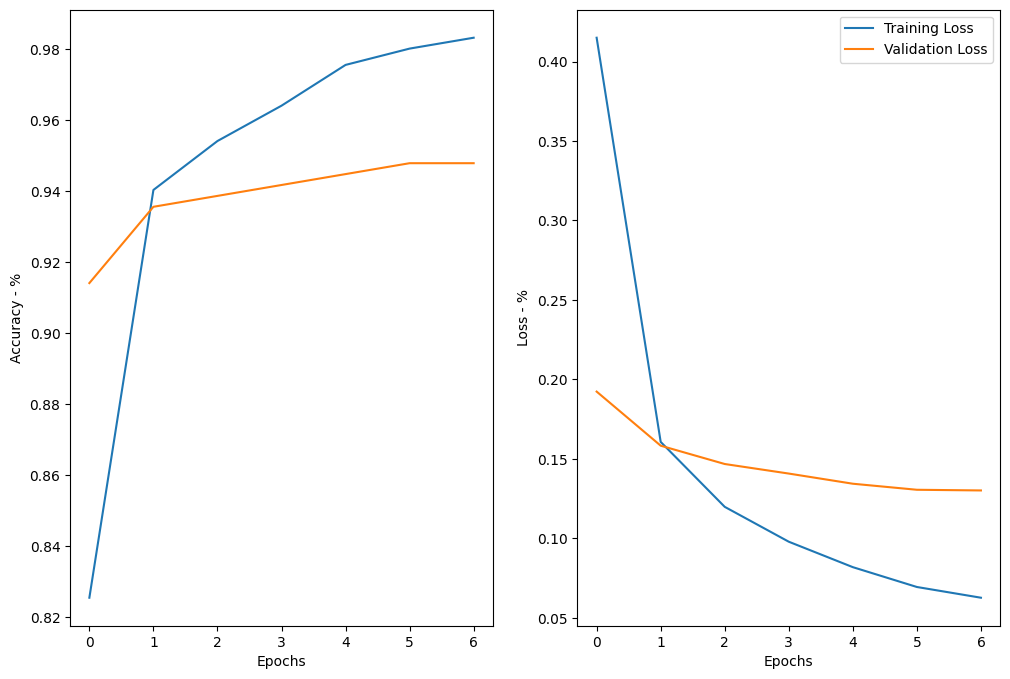

In [4]:
fig, axs = plt.subplots(1,2,figsize=(12,8),dpi=100)
axs[0].plot(history.history['accuracy'],label='Training Acc')
axs[0].plot(history.history['val_accuracy'],label='Validation Acc')
axs[0].set_ylabel("Accuracy - %")
axs[0].set_xlabel("Epochs")
axs[1].plot(history.history["loss"],label='Training Loss')
axs[1].plot(history.history["val_loss"],label='Validation Loss')
axs[1].set_ylabel("Loss - %")
axs[1].set_xlabel("Epochs")
plt.legend()
plt.show()

In [5]:
loss, accuracy = model.evaluate(d_val)

print(loss,accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9530 - loss: 0.1279
0.13010689616203308 0.9478527903556824


In [6]:
import numpy as np

img_path = "non_fire_test.jpg"

img = tf.keras.utils.load_img(
    img_path, target_size=(48, 48)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)


score = predictions[0] 
chosen_class = np.argmax(score)
class_name = class_names[chosen_class]

print(f"Resultado: {class_name}")
print(f"Confiança: {100 * np.max(score):.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Resultado: non_fire
Confiança: 56.63%


## Simulating ESP conditions

In [7]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

augmented_train_data = d_train.map(lambda x,y: (data_augmentation(x,training=True),y),num_parallel_calls=tf.data.AUTOTUNE)

augmented_train_data = augmented_train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_0.35_224            │ (None, 2, 2, 1280)     │       410,208 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,770 (1.57 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 410,208 (1.56 MB)

Epoch 1/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.8243 - loss: 0.4142 - val_accuracy: 0.9356 - val_loss: 0.1912
Epoch 2/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9382 - loss: 0.1634 - val_accuracy: 0.9417 - val_loss: 0.1694
Epoch 3/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9515 - loss: 0.1236 - val_accuracy: 0.9448 - val_loss: 0.1816
Epoch 4/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9593 - loss: 0.1012 - val_accuracy: 0.9387 - val_loss: 0.1727
Epoch 5/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9692 - loss: 0.0862 - val_accuracy: 0.9448 - val_loss: 0.1855
Epoch 6/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9756 - loss: 0.0764 - val_accuracy: 0.9448 - val_loss: 0.1966
Epoch 7/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9667 - loss: 0.0788 - val_accuracy: 0.9325 - val_loss: 0.1913
train_acc: [0.8760520219802856, 0.9380260109901428, 0.9563886523246765, 0.9617444276809692, 0.9693955779075623, 0.97

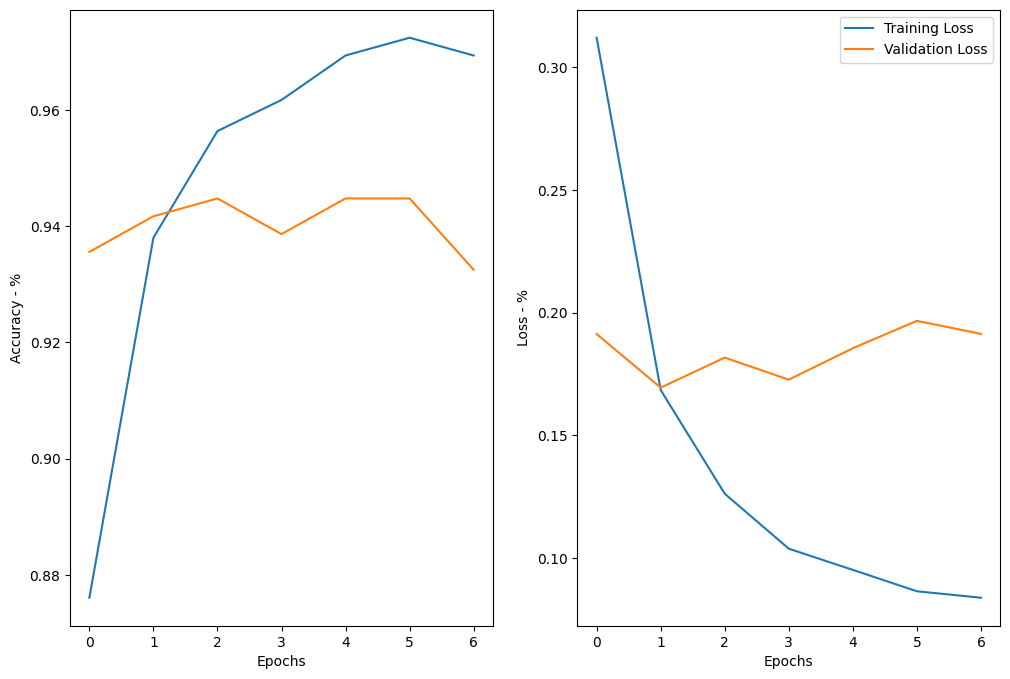

In [8]:
model_esp_conditions = models.Sequential([
    layers.Rescaling(1./127.5,offset=-1,input_shape=(IMG_SIZE,IMG_SIZE,3)),
    #layers.GaussianNoise(0.2),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(len(class_names),activation='softmax')
])

model_esp_conditions.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_esp_conditions.summary()

history_esp = model_esp_conditions.fit(
    augmented_train_data,
    validation_data=d_val,
    epochs=7
)

print(f"train_acc: {history_esp.history['accuracy']}\nval_acc: {history_esp.history['val_accuracy']}")
fig, axs = plt.subplots(1,2,figsize=(12,8),dpi=100)
axs[0].plot(history_esp.history['accuracy'],label='Training Acc')
axs[0].plot(history_esp.history['val_accuracy'],label='Validation Acc')
axs[0].set_ylabel("Accuracy - %")
axs[0].set_xlabel("Epochs")
axs[1].plot(history_esp.history["loss"],label='Training Loss')
axs[1].plot(history_esp.history["val_loss"],label='Validation Loss')
axs[1].set_ylabel("Loss - %")
axs[1].set_xlabel("Epochs")
plt.legend()
plt.show()

In [9]:
loss, accuracy = model_esp_conditions.evaluate(d_val)
print(loss,accuracy)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9281 - loss: 0.2037
0.19132272899150848 0.9325153231620789


### Quantization and Pruning

In [24]:
# O % garante que instala no kernel atual do Jupyter
%pip install tf_keras tensorflow-model-optimization

  Using cached tf_keras-2.20.1-py3-none-any.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_esp_conditions)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()


with open("fire_model_dynamic.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\vicen\AppData\Local\Temp\tmpvvdats3m\assets


INFO:tensorflow:Assets written to: C:\Users\vicen\AppData\Local\Temp\tmpvvdats3m\assets


Saved artifact at 'C:\Users\vicen\AppData\Local\Temp\tmpvvdats3m'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='keras_tensor_166')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  1922792958608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793239120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793239472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793238592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793238768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793242464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793261008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793261712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793260480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1922793260656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  192

### Model Quantization Metrics

In [30]:
# F1_score implementation

def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    
    recall = true_positives / (possible_positives + 1e-7)
    return recall

def precision_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    
    precision = true_positives / (predicted_positives + 1e-7)
    return precision

def f1_m(y_true, y_pred):
    p = precision_m(y_true, y_pred)
    r = recall_m(y_true, y_pred)
    return 2 * ((p * r) / (p + r + 1e-7))

c:\Users\vicen\miniconda3\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_0.35_224            │ (None, 2, 2, 1280)     │       410,208 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,770 (1.57 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 410,208 (1.56 MB)

Epoch 1/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.6899 - f1_m: 0.6899 - loss: 0.7249 - precision: 0.6821 - recall: 0.6207 - val_accuracy: 0.9202 - val_f1_m: 0.9138 - val_loss: 0.1969 - val_precision: 0.8944 - val_recall: 0.9203
Epoch 2/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9226 - f1_m: 0.9226 - loss: 0.1974 - precision: 0.9173 - recall: 0.9231 - val_accuracy: 0.9509 - val_f1_m: 0.9422 - val_loss: 0.1639 - val_precision: 0.9485 - val_recall: 0.9348
Epoch 3/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9478 - f1_m: 0.9478 - loss: 0.1422 - precision: 0.9490 - recall: 0.9423 - val_accuracy: 0.9479 - val_f1_m: 0.9394 - val_loss: 0.1555 - val_precision: 0.9481 - val_recall: 0.9275
Epoch 4/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9652 - f1_m: 0.9652 - loss: 0.1095 - precision: 0.9681 - recall: 0.9589 - val_accuracy: 0.9509 - val_f1_m: 0.9422 - val_loss: 0.1540 - val_precision: 0.9621 - val_recall: 0.9203
Epoch 5/7
41/41 ━━━━━━━━━━━━━━

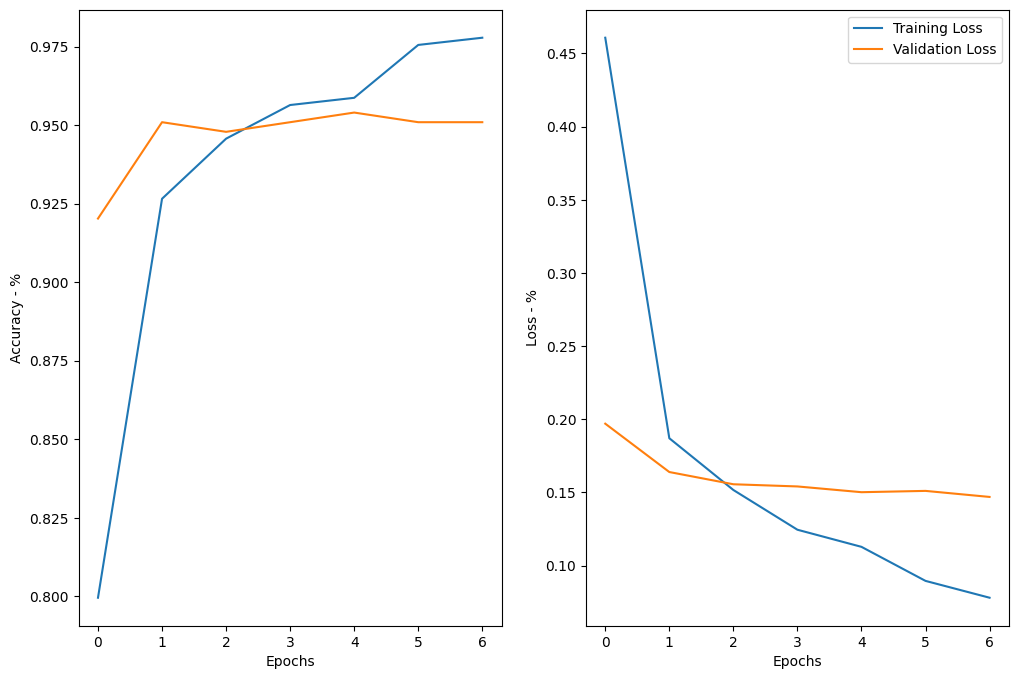

In [31]:
converter = models.Sequential([
    layers.Rescaling(1./127.5,offset=-1,input_shape=(IMG_SIZE,IMG_SIZE,3)),
    #layers.GaussianNoise(0.2),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(len(class_names),activation='softmax')
])

converter.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(class_id=0, name='precision'),
        tf.keras.metrics.Recall(class_id=0, name='recall'),
        f1_m

    ]
)
converter.summary()

history_esp_converter = converter.fit(
    augmented_train_data,
    validation_data=d_val,
    epochs=7
)

print(f"train_acc: {history_esp_converter.history['accuracy']}\nval_acc: {history_esp_converter.history['val_accuracy']}")
fig, axs = plt.subplots(1,2,figsize=(12,8),dpi=100)
axs[0].plot(history_esp_converter.history['accuracy'],label='Training Acc')
axs[0].plot(history_esp_converter.history['val_accuracy'],label='Validation Acc')
axs[0].set_ylabel("Accuracy - %")
axs[0].set_xlabel("Epochs")
axs[1].plot(history_esp_converter.history["loss"],label='Training Loss')
axs[1].plot(history_esp_converter.history["val_loss"],label='Validation Loss')
axs[1].set_ylabel("Loss - %")
axs[1].set_xlabel("Epochs")
plt.legend()
plt.show()

In [32]:
results = converter.evaluate(d_val)

for name, value in zip(converter.metrics_names, results):
    print(f"{name}: {value}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9492 - f1_m: 0.9478 - loss: 0.1555 - precision: 0.9495 - recall: 0.9333
loss: 0.1468682587146759
compile_metrics: 0.9509202241897583
